# Esercizio 2 (risoluzione avanzata)

#### Autore: Pasquale
#### Data:   26 aprile 2020

In [320]:
# Importazioni moduli


import re                                     # modulo per usare le espressioni regolari
import chardet                                # modulo per rilevare l'encoding di un file di testo
import spacy                                  # modulo per analisi NLP
from spacy_langdetect import LanguageDetector # funzione per ricerca lingua del testo
from collections import Counter               # funzione che conta elementi
from wordcloud import WordCloud               # modulo per costruire nuvole di parole
import matplotlib.pyplot as plt               # modulo per fare grafici
import numpy as np                            # modulo per la manipolazione array e algebra lineare
from PIL import Image                         # modulo per la lettura delle immagini

In [321]:
# Apertura del file considerando il suo encoding

with open("sonnet.txt", "rb") as rawdata:
    rawtext = rawdata.read()
       
enco = chardet.detect(rawtext)['encoding']

with open("sonnet.txt", "r", encoding = enco) as textdata:
    text_stringa = textdata.read()

In [322]:
# filtro che sostituisce con uno spazio tutto cio che non è un carattere 
# indicato in parentesi quadre

text_filtered = re.sub('[^A-Za-z àèéìòù]', ' ', text_stringa)

In [323]:
# Trasformazione delle parole in caratteri minuscoli ed eliminazione di eventuali spazi
# sia all'inizio che alla fine della stringa

text_result = text_filtered.lower().strip()

In [324]:
# ricerca della lingua del testo
nlp = spacy.load('it_core_news_sm')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
doc = nlp(text_result)
lang = doc._.language.get('language')

In [325]:
# caricamento del modello  di registro rispetto alla lingua trovata (Inglese o Italiano)

if lang == 'it': 
    NLP = spacy.load('it_core_news_sm')
elif lang == 'en':
    NLP = spacy.load('en_core_web_sm')

In [326]:
# applicazione del modello al nostro testo 

textNLP_doc = NLP(text_result)

In [327]:
# tokenizzazione del testo ed eliminazione delle parole di stop

words = [token.text for token in textNLP_doc
         if not token.is_stop]

In [328]:
# eliminazione di eventuali elementi vuoti della lista
# ed eliminazione degli elementi parola lunghi un carattere

words_filtered = " ".join(words).split()
words_filtered_single = [i for i in words_filtered if len(i) > 1]

In [329]:
# conteggio delle parole uniche

words_dict = Counter(words_filtered_single)

# ordinamento crescente rispetto agli score

words_dict_sorted = {k: v for k, v in sorted(words_dict.items(), key = lambda item: item[1])}
words_dict_sorted

{'compare': 1,
 'day': 1,
 'art': 1,
 'lovely': 1,
 'temperate': 1,
 'rough': 1,
 'winds': 1,
 'shake': 1,
 'darling': 1,
 'buds': 1,
 'lease': 1,
 'hath': 1,
 'short': 1,
 'date': 1,
 'hot': 1,
 'eye': 1,
 'heaven': 1,
 'shines': 1,
 'gold': 1,
 'complexion': 1,
 'dimmed': 1,
 'declines': 1,
 'chance': 1,
 'nature': 1,
 'changing': 1,
 'course': 1,
 'untrimmed': 1,
 'thy': 1,
 'fade': 1,
 'lose': 1,
 'possession': 1,
 'ow': 1,
 'death': 1,
 'brag': 1,
 'wand': 1,
 'rest': 1,
 'shade': 1,
 'lines': 1,
 'time': 1,
 'grow': 1,
 'men': 1,
 'breathe': 1,
 'eyes': 1,
 'lives': 1,
 'gives': 1,
 'life': 1,
 'thee': 2,
 'eternal': 2,
 'st': 2,
 'long': 2,
 'shall': 3,
 'summer': 3,
 'fair': 3,
 'thou': 4}

In [330]:
# preparazione della maschera per la nuvola di parole

#python_mask = np.array(Image.open("images3.png"))

In [331]:
# preparazione della nuvola di parole

cloud_string = ' '.join(words_filtered_single)

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      #mask = python_mask,
                      #contour_width = 1,
                      #contour_color = 'green',
                      min_font_size = 10).generate(cloud_string)

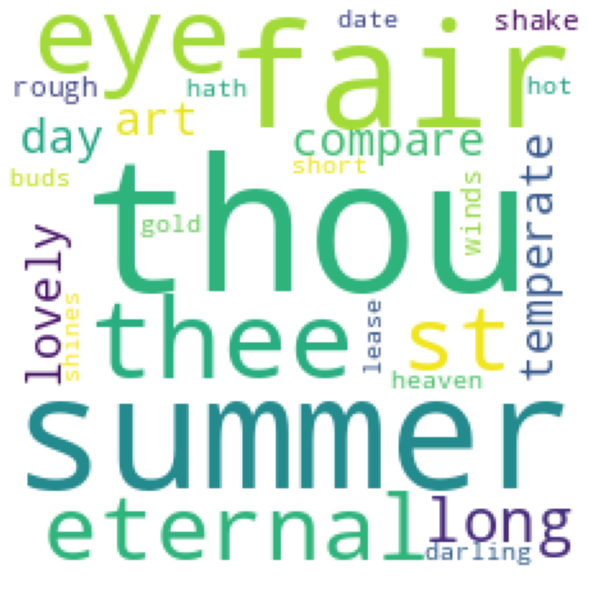

In [332]:
# plot della nuvola di parole       

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 